## Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources\charity_data.csv")
# application_df.head()

In [16]:
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [17]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.   CHOSE NOT TO DROP NAME. TOO VALUABLE TO THE TARGET.

application_df = application_df.drop(['EIN'], axis=1)

# Determine the number of unique values in each column.

application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [18]:
# Look at APPLICATION_TYPE value counts for binning

app_counts = application_df['APPLICATION_TYPE'].value_counts()

print(app_counts)
print('------------------------------')
print(list(app_counts[app_counts < 500].index))

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
------------------------------
['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']


In [19]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = list(app_counts[app_counts < 10].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [20]:
# NAME COLUMN PROCESSING

name_counts = application_df['NAME'].value_counts()

name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

(-10.0, 10.0)

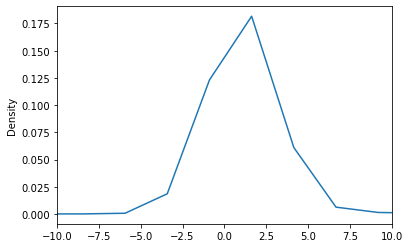

In [21]:
# take a peak

import matplotlib.pyplot as plt
name_counts.plot.density()
plt.xlim(left = -10, right = 10)

In [22]:
# Choose a cutoff value and create a list of application types to be replaced

name_to_replace = list(name_counts[name_counts < 2].index)

# Replace in dataframe
for name in name_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [23]:
# Look at CLASSIFICATION value counts for binning

class_counts = application_df['CLASSIFICATION'].value_counts()

class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

(0.0, 3000.0)

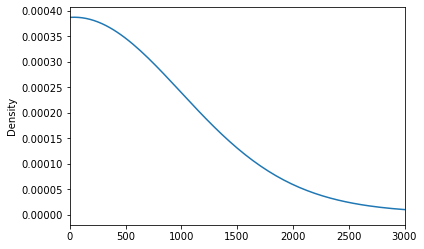

In [24]:
# look

import matplotlib.pyplot as plt
class_counts.plot.density()
plt.xlim(left = 0, right = 3000)

In [25]:
# You may find it helpful to look at CLASSIFICATION value counts >1

classifications_to_replace = list(class_counts[class_counts < 1000].index)


In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`

X = application_df.drop('IS_SUCCESSFUL', axis=1)
X_dummies = pd.get_dummies(X)

In [28]:
# Split our preprocessed data into our features and target arrays

y_label = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

In [29]:
X_train.shape

(25724, 840)

In [30]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=150, activation="sigmoid", input_dim=840))

# layer
nn_model.add(tf.keras.layers.Dense(units=60, activation="sigmoid"))

# layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               126150    
                                                                 
 dense_1 (Dense)             (None, 60)                9060      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 137,071
Trainable params: 137,071
Non-trainable params: 0
_________________________________________________________________


In [32]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
this_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq='epoch', period = 5)

# Compile the model

nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50, callbacks = [this_callback])

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4818 - accuracy: 0.7756
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.8027
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4140 - accuracy: 0.8042
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4109 - accuracy: 0.8045
Epoch 5/50
801/804 [============================>.] - ETA: 0s - loss: 0.4086 - accuracy: 0.8068
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8069
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4070 - accuracy: 0.8061
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4061 - accuracy: 0.8070
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.4048 - accuracy: 0.8061
Epoch 9/50
804/804 [==============================] - 1s 1ms/s

In [33]:
#BAM

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4670 - accuracy: 0.7998 - 355ms/epoch - 1ms/step
Loss: 0.46700918674468994, Accuracy: 0.7997667789459229


In [34]:
# Export our model to HDF5 file

nn_model.save("AlphabetSoupCharity_Optomization.h5")

In [ ]:
#################### another attempt - slightly better ##################################

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="sigmoid", input_dim=840))


nn_model.add(tf.keras.layers.Dense(units=4, activation="sigmoid"))


nn_model.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=2, activation="sigmoid"))

nn_model.add(tf.keras.layers.Dense(units=2, activation="sigmoid"))

# Output layer - SIGMOID?
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 4205      
                                                                 
 dense_5 (Dense)             (None, 4)                 24        
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 4,261
Trainable params: 4,261
Non-traina

In [36]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
this_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq='epoch', period = 5)

# Compile the model

nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25, callbacks = [this_callback])



Epoch 1/25
804/804 [==============================] - 1s 863us/step - loss: 0.7033 - accuracy: 0.5335
Epoch 2/25
804/804 [==============================] - 1s 1ms/step - loss: 0.6588 - accuracy: 0.6301
Epoch 3/25
804/804 [==============================] - 1s 836us/step - loss: 0.5762 - accuracy: 0.8036
Epoch 4/25
804/804 [==============================] - 1s 829us/step - loss: 0.5201 - accuracy: 0.8065
Epoch 5/25
794/804 [============================>.] - ETA: 0s - loss: 0.4945 - accuracy: 0.8077
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 853us/step - loss: 0.4943 - accuracy: 0.8078
Epoch 6/25
804/804 [==============================] - 1s 894us/step - loss: 0.4811 - accuracy: 0.8077
Epoch 7/25
804/804 [==============================] - 1s 916us/step - loss: 0.4740 - accuracy: 0.8090
Epoch 8/25
804/804 [==============================] - 1s 872us/step - loss: 0.4702 - accuracy: 0.8089
Epoch 9/25
804/804 [============================

In [37]:
# BAM 2

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4441 - accuracy: 0.8007 - 202ms/epoch - 752us/step
Loss: 0.44414055347442627, Accuracy: 0.8006997108459473


In [38]:
nn_model.save("AlphabetSoupCharity_Optomization2.h5")